<a href="https://colab.research.google.com/github/lopespaloma/predicao-avc-projeto-datascience/blob/main/projeto_a3_comite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
dataset = pd.read_csv("dados-regressao-logistica-tratados.csv", delimiter=",")

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(dataset.drop('AVC', axis=1),
                                                    dataset['AVC'],
                                                    test_size=0.3,
                                                    random_state=101)

# Árvore de Decisão

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
tree_model = DecisionTreeClassifier(criterion='entropy', max_depth=5)
tree_model.fit(x_train, y_train)

tree_predictions = tree_model.predict(x_test)
tree_predictions

array([0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1])

# Regressão Logística

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
rl_model = LogisticRegression(solver='lbfgs', max_iter=1000)
rl_model.fit(x_train, y_train)

rl_predictions = rl_model.predict(x_test)
rl_predictions

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0])

# K-Nearest Neighbors (KNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn_model.fit(x_train, y_train)

knn_predictions = knn_model.predict(x_test)
knn_predictions

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1])

# Comitê

In [ ]:
from statistics import mode

def gerar_saidas_comite(saidas_1, saidas_2, saidas_3):
  lista_de_saida = []
  indice = 0

  while indice < 150:
    saidas_da_vez = [saidas_1[indice], saidas_2[indice], saidas_3[indice]]
    lista_de_saida.append(mode(saidas_da_vez))
    indice += 1

  return np.array(lista_de_saida)

saidas_do_comite = gerar_saidas_comite(tree_predictions, rl_predictions, knn_predictions)
saidas_do_comite

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1])

In [ ]:
print("\nMatriz de confusão detalhada:\n",
      pd.crosstab(y_test, saidas_do_comite,
                  rownames= ['Real'],
                  colnames=['Predito'],
                  margins=True,
                  margins_name ='Todos'))


Matriz de confusão detalhada:
 Predito   0   1  Todos
Real                  
0        59  22     81
1        10  59     69
Todos    69  81    150


In [ ]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, saidas_do_comite))
print('MSE:', metrics.mean_squared_error(y_test, saidas_do_comite))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, saidas_do_comite)))

MAE: 0.21333333333333335
MSE: 0.21333333333333335
RMSE: 0.46188021535170065


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.metrics import accuracy_score
acuracia = accuracy_score(y_test, saidas_do_comite)
print(f"Acurácia do comitê: {acuracia:.2f}")

Acurácia do comitê: 0.74


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, saidas_do_comite))

              precision    recall  f1-score   support

           0       0.76      0.75      0.76        81
           1       0.71      0.72      0.72        69

    accuracy                           0.74       150
   macro avg       0.74      0.74      0.74       150
weighted avg       0.74      0.74      0.74       150



In [ ]:
scores = []
for i in range(500):
  x_train, x_test, y_train, y_test = train_test_split(dataset.drop('AVC', axis=1),
                                                      dataset['AVC'],
                                                      test_size=0.3)

  tree_model = DecisionTreeClassifier(criterion='entropy', max_depth=5)
  tree_model.fit(x_train, y_train)
  tree_predictions = tree_model.predict(x_test)

  rl_model = LogisticRegression(solver='lbfgs', max_iter=1000)
  rl_model.fit(x_train, y_train)
  rl_predictions = rl_model.predict(x_test)

  knn_model = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
  knn_model.fit(x_train, y_train)
  knn_predictions = knn_model.predict(x_test)

  saidas_do_comite = gerar_saidas_comite(tree_predictions, rl_predictions, knn_predictions)

  acuracia = accuracy_score(y_test, saidas_do_comite)

  scores.append(round(acuracia, 2))

Média: 76.42%
Desvio padrão: 3.06%


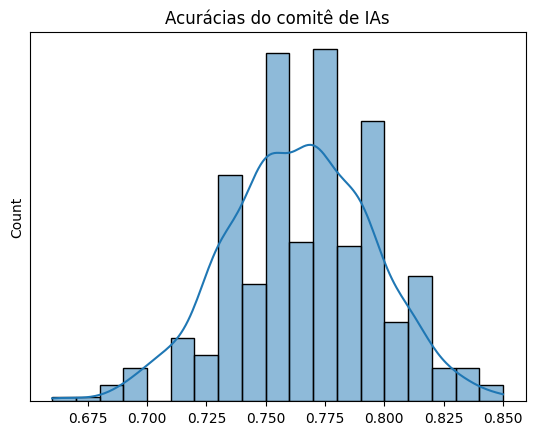

In [ ]:
print("Média: {:.2f}%".format(np.mean(scores)*100))
print("Desvio padrão: {:.2f}%".format(np.std(scores)*100))
sns.histplot(scores, kde=True)
plt.yticks([])
plt.title("Acurácias do comitê de IAs")
plt.show()